# Regression Plots <a id="10"></a>


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html).

In lab *Pie Charts, Box Plots, Scatter Plots, and Bubble Plots*, I learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this project, I explored *seaborn* and learned how efficient it is to create regression lines and fits using this library!

First installed *seaborn*

In [2]:
# install seaborn
!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge --> 2020.6.20-py36_0  anaconda
    seaborn:         0.9.0-pyh91ea838_1                   --> 0.10.

Created a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

Downloaded and imported our primary Canadian Immigration dataset using *pandas* `read_excel()` method. Normally, before doing that, I would need to download a module which *pandas* requires to read in excel files. This module is **xlrd**. For convenience, I have pre-installed this module, so I would not have to worry about that. Otherwise, I would need to run the following line of code to install the **xlrd** module:
```
!conda install -c anaconda xlrd --yes
```

Download the dataset and read it into a *pandas* dataframe:

In [6]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Cleaned up data. I did some modifications to the original dataset to make it easier to create visualizations.

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Created a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [8]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.

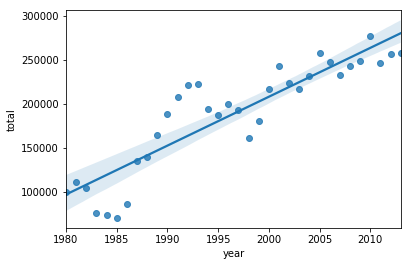

In [9]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

This is not magic; it is *seaborn*! I can also customize the color of the scatter plot and regression line. Let's change the color to green.

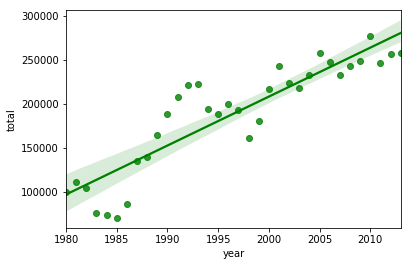

In [10]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

I can customize the marker shape, so instead of circular markers, let's use '+'.

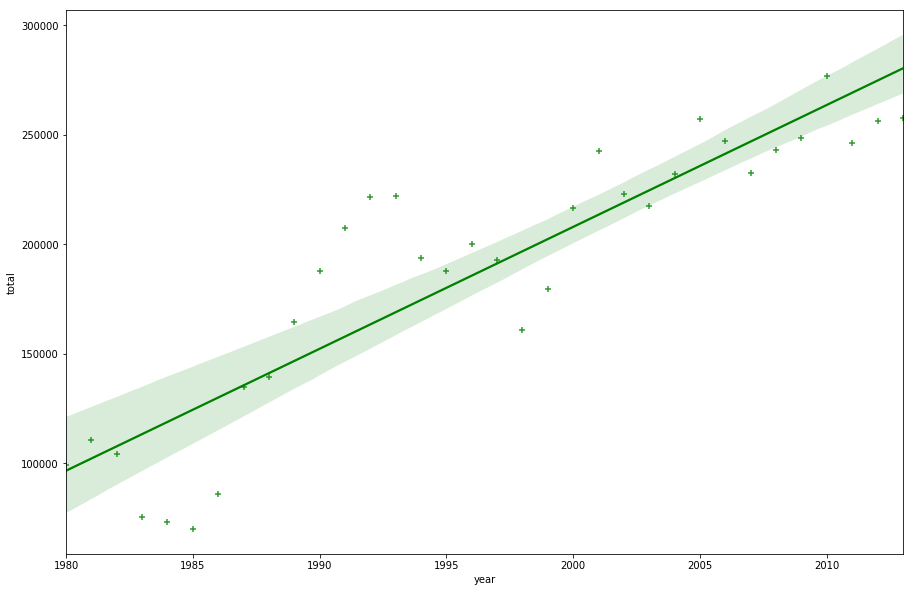

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Increased the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

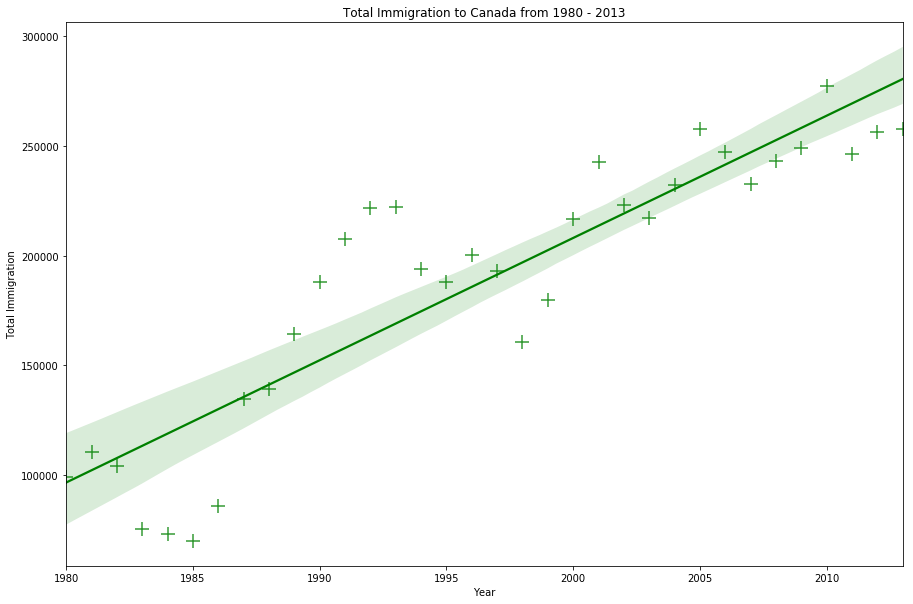

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

To a white background with gridlines.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

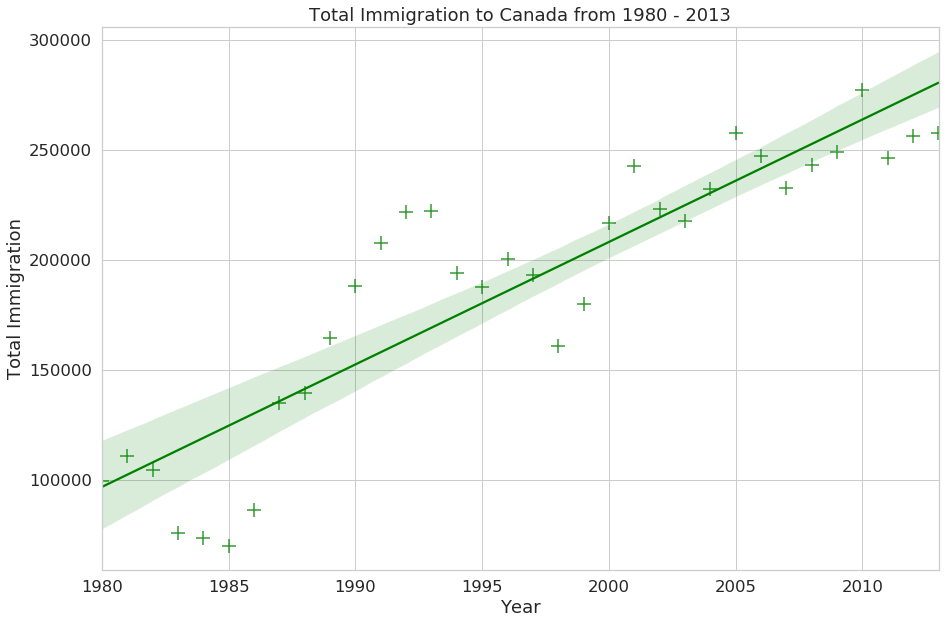

In [16]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Used seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

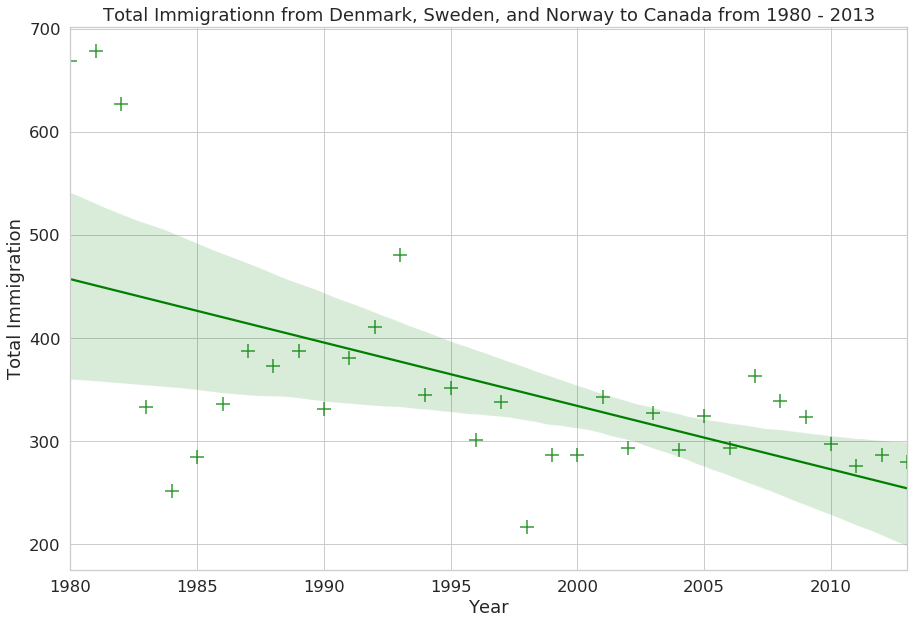

In [17]:
### type your answer here


# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()



 # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))


# reset index in place
df_total.reset_index(inplace=True)


 # rename columns
df_total.columns = ['year', 'total']


# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)


 # define figure size
plt.figure(figsize=(15, 10))


 # define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')



